<img src="https://www.th-koeln.de/img/logo.svg" style="float:right;" width="200">

# 1st exercise: <font color="#C70039">Work with standard deviations for anomaly detection</font>
* Course: AML
* Lecturer: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>
* Author of notebook: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>
* Date:   24.10.2022
* Studend Name: Jüri Keller
* Studend matriculation number: 11133325

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Standard_deviation_diagram.svg/1200px-Standard_deviation_diagram.svg.png" style="float: center;" width="450">

---------------------------------
**GENERAL NOTE 1**: 
Please make sure you are reading the entire notebook, since it contains a lot of information on your tasks (e.g. regarding the set of certain paramaters or a specific computational trick), and the written mark downs as well as comments contain a lot of information on how things work together as a whole. 

**GENERAL NOTE 2**: 
* Please, when commenting source code, just use English language only. 
* When describing an observation please use English language, too
* This applies to all exercises throughout this course.  

---------------------

### <font color="ce33ff">DESCRIPTION</font>:
This notebook allows you for getting into standard deviations as a common technique to detect anomalies when the data is normally distributed. 

-------------------------------------------------------------------------------------------------------------

### <font color="FFC300">TASKS</font>:
The tasks that you need to work on within this notebook are always indicated below as bullet points. 
If a task is more challenging and consists of several steps, this is indicated as well. 
Make sure you have worked down the task list and commented your doings. 
This should be done by using markdown.<br> 
<font color=red>Make sure you don't forget to specify your name and your matriculation number in the notebook.</font>

**YOUR TASKS in this exercise are as follows**:
1. import the notebook to Google Colab or use your local machine.
2. make sure you specified you name and your matriculation number in the header below my name and date. 
    * set the date too and remove mine.
3. read the entire notebook carefully 
    * add comments whereever you feel it necessary for better understanding
    * run the notebook for the first time.
    * understand the output
4. go and find three different data sets on the web 
    * kaggle.com might be a good source (they also offer an API for data download)
    * make sure two of the three data sets are normally distributed
    * download one data set that is not normally distributed
5. visualize the data
6. compute the anomalies
7. visualize the anomalies
8. does the 0,3% rule apply?
9. what are differences between the normally distributed and the non-normally distributed data sets with respect to the outlier detection? 
10. which statement can be made and which cannot? 
-----------------------------------------------------------------------------------

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randn
np.random.seed(1)

In [3]:
# Function to Detection Outlier on one-dimentional datasets.
def find_anomalies(random_data: np.array) -> np.array:
    """Find anomalies in the dataset by using the standard deviation.

    Outliers are defined as data points that are more than 3 times the 
    standard deviation away from the mean.
    A lower and a upper limit is calculated and all data points outside 
    of these limits are considered as outliers.

    Args:
        random_data (np.array): Random array od data points.

    Returns:
        np.array: _description_
    """
    #define a list to accumlate anomalies
    anomalies = []
    
    # Set upper and lower limit to 3 standard deviation
    random_data_std = np.std(random_data)
    random_data_mean = np.mean(random_data)
    anomaly_cut_off = random_data_std * 3
    
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    
    print("lower limit=", round(lower_limit,8))
    print("upper limit=", round(upper_limit,8))
    
    # Generate outliers list
    for outlier in random_data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    
    return anomalies

In [4]:
# multiply and add by random numbers to get some real values
# randn generates samples from the normal distribution (important - see below)
data = np.random.randn(50000)  * 20 + 20

In [5]:
anomalies = find_anomalies(data)

lower limit= -39.96482266
upper limit= 80.11636225


## Result
These anomalies are exceeding the lower and upper 3rd scatter range.
Thus, statistically spoken, they do belong to a population size of less than 0,3% of the entire data set! 
For sure, the above conclusion is true if and only if the data is normally distributed!


In [6]:
print(anomalies)

[80.61714224744061, 99.17205408075927, 86.4215751234073, -41.0752876085261, -43.06714900382097, -40.32063970418597, 88.65326863591119, -41.28282712210201, 94.80497807409178, 82.70094680175814, 84.76686393504752, -45.06068469953237, 82.64059456281011, 80.25509136474466, -43.81232693648161, -45.21230191553079, 88.08604551497943, 82.369591815651, 85.9708104656157, 82.97968050439259, -45.8971681339703, -41.11266480828613, 100.53698089094755, -44.38264211247683, 82.23783662033449, 92.26554014166295, 87.96231313004853, 91.21746641411097, -53.128801985095905, -45.641575926212354, 91.21225295344836, -43.46923274683489, 82.13498657145581, 82.90737927394908, -46.216851244091984, -41.9565310384887, -45.6065519410858, 80.5243698860871, -43.30420249353775, -42.25263324372853, 81.59215546151304, 103.36235355910189, 96.68762041821407, -40.586879558462776, -48.71851620008829, -45.18412137279293, 81.54158108441533, 84.5587224070789, -40.7688517191754, -44.08128900692253, -42.043297873881315, 87.7143031

# Datasets

In [14]:
from sklearn import datasets
from scipy.stats import norm
from scipy import stats

import matplotlib.pyplot as plt

In [15]:
def is_normal(feature: pd.Series, alpha: float = 0.05) -> bool:
    """D'Agostino and Pearson's test as omnibus test of normality"""
    k2, p = stats.normaltest(feature)
    mu, std = norm.fit(feature.dropna()) # mean and standard deviation

    print("p = {:g}".format(p))
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print("The null hypothesis can be rejected")
    else:
        print("The null hypothesis cannot be rejected")
    
    # Plot the histogram.
    plt.hist(feature, bins=25, density=True)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    title = "n = %.0f, mean = %.2f,  std = %.2f" % (len(feature), mu, std)
    plt.title(title)
    plt.show()

In [16]:
def plot_outliers(data: pd.Series, outliers: list, xlabel: str = "", ylabel: str= ""):
    """Plot the data as a scatter plot with all outliers highlighted."""
    normal_points = data[~data.isin(outliers)]
    outlier_points = data[data.isin(outliers)]
    plt.scatter(normal_points.index, normal_points, c="b", label="normal", s = 1)
    plt.scatter(outlier_points.index, outlier_points, c="r", label="outlier", s = 1)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

In [17]:
def plot_dataset(title: str, df: pd.DataFrame, nrows: int = 5):
    # num_per_ax = math.ceil(math.sqrt(len(char_lenghths.columns)-1))
    fig, axs = plt.subplots(ncols=3, nrows=nrows, figsize=(15, 5*nrows))
    fig.tight_layout(pad=6.0)
    fig.suptitle(title, fontsize=16)

    axs = axs.flat
    for column, ax in zip(df.columns, axs):
        data = df[column].sort_values().reset_index(drop=True).dropna()

        ax.hist(data, bins=25, density=True)

        if data.dtype == "float64":
            # real valued data
            k2, p = stats.normaltest(data)
            mu, std = norm.fit(data) # mean and standard deviation
            normal = "True" if p > 0.05 else "False"
            title = "%s:\n n = %.0f, mean = %.2f,  std = %.2f \n Normal = %s, p-value = %.5f" % (column, len(data), mu, std, normal, p)
        
            xmin, xmax = ax.get_xlim()
            x = np.linspace(xmin, xmax, 100)
            p = norm.pdf(x, mu, std)
            ax.plot(x, p, 'k', linewidth=2)
        else:
            # Categorial data
            title = "%s:\nData type = %s" % (column, data.dtype)

            # Disable x ticks for categorial variables with more than 20 categories
            if data.unique().size < 20:
                ax.set_xticks(data.unique())
                ax.set_xticklabels(data.unique())
            else:
                ax.set_xticks([])
                ax.set_xticklabels([])

        ax.set_title(title)


### Iris (normal)

In [18]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris["data"], columns = iris["feature_names"])

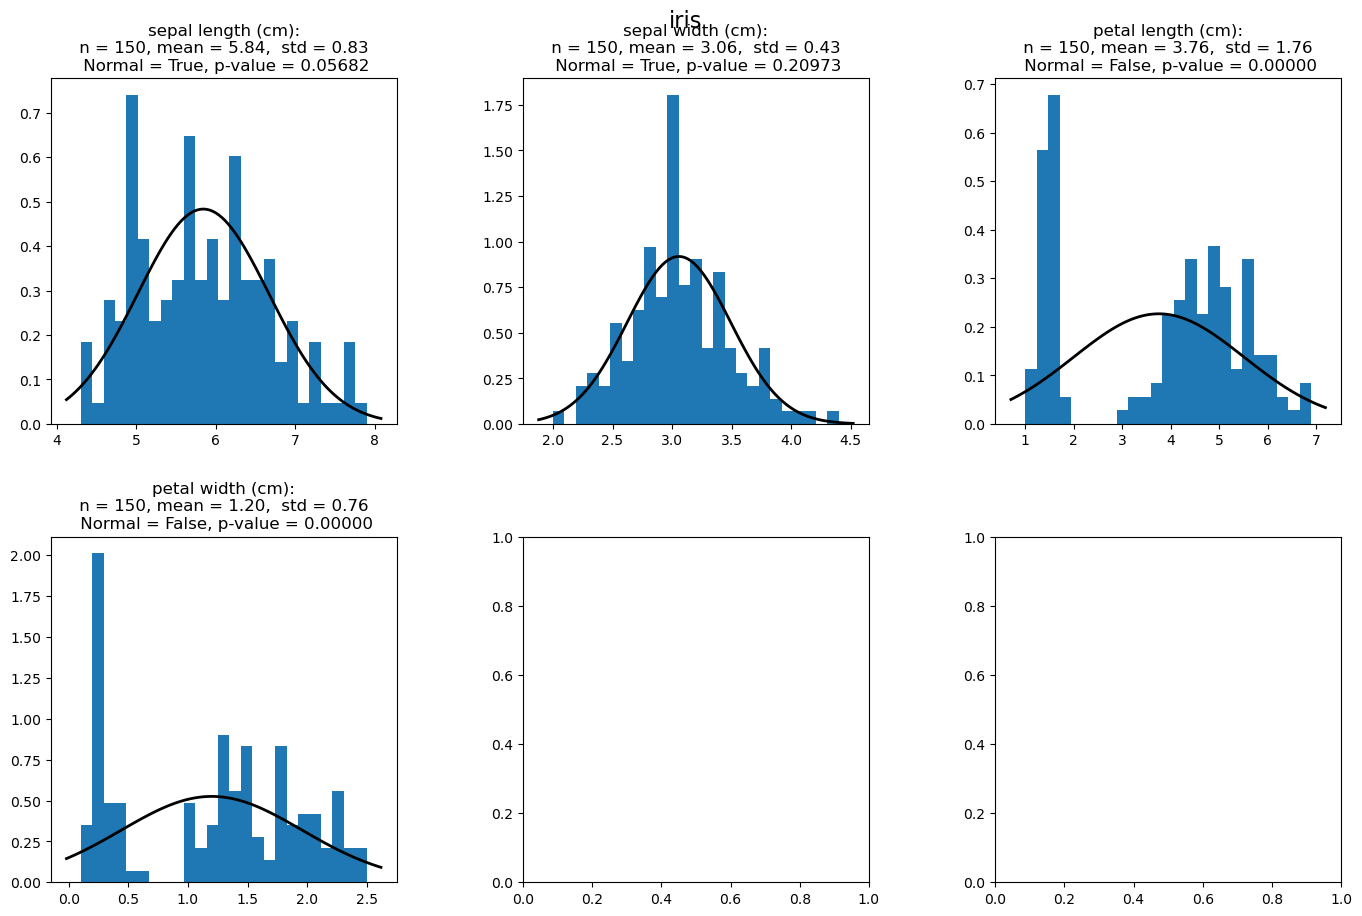

In [19]:
plot_dataset("iris", iris_df, nrows=2)

In [20]:
data = iris_df["sepal width (cm)"].sort_values().reset_index(drop=True)

p = 0.209734
The null hypothesis cannot be rejected


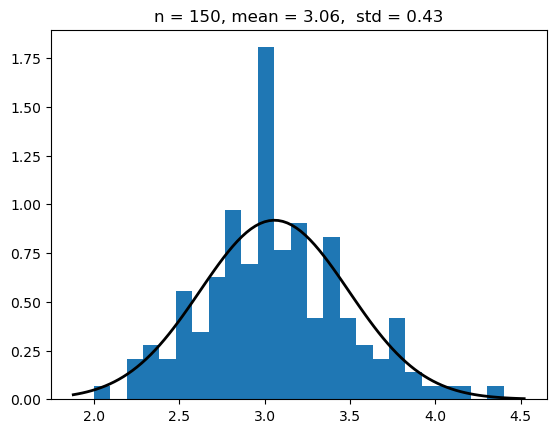

In [21]:
is_normal(data)

In [22]:
anomalies = find_anomalies(data)
anomalies

lower limit= 1.75410043
upper limit= 4.36056624


[4.4]

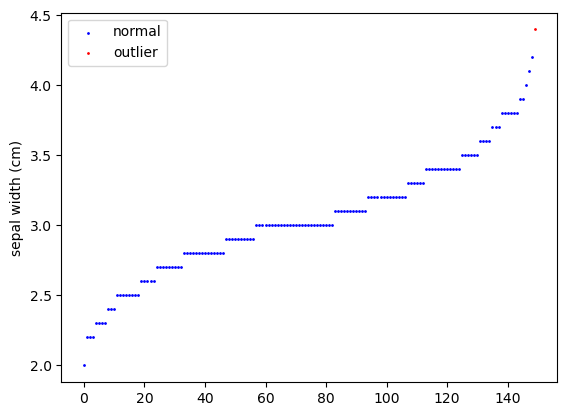

In [23]:
plot_outliers(data, anomalies, ylabel="sepal width (cm)")

### wine (normal)

In [24]:
wine = datasets.load_wine()
wine_df = pd.DataFrame(wine["data"], columns = wine["feature_names"])

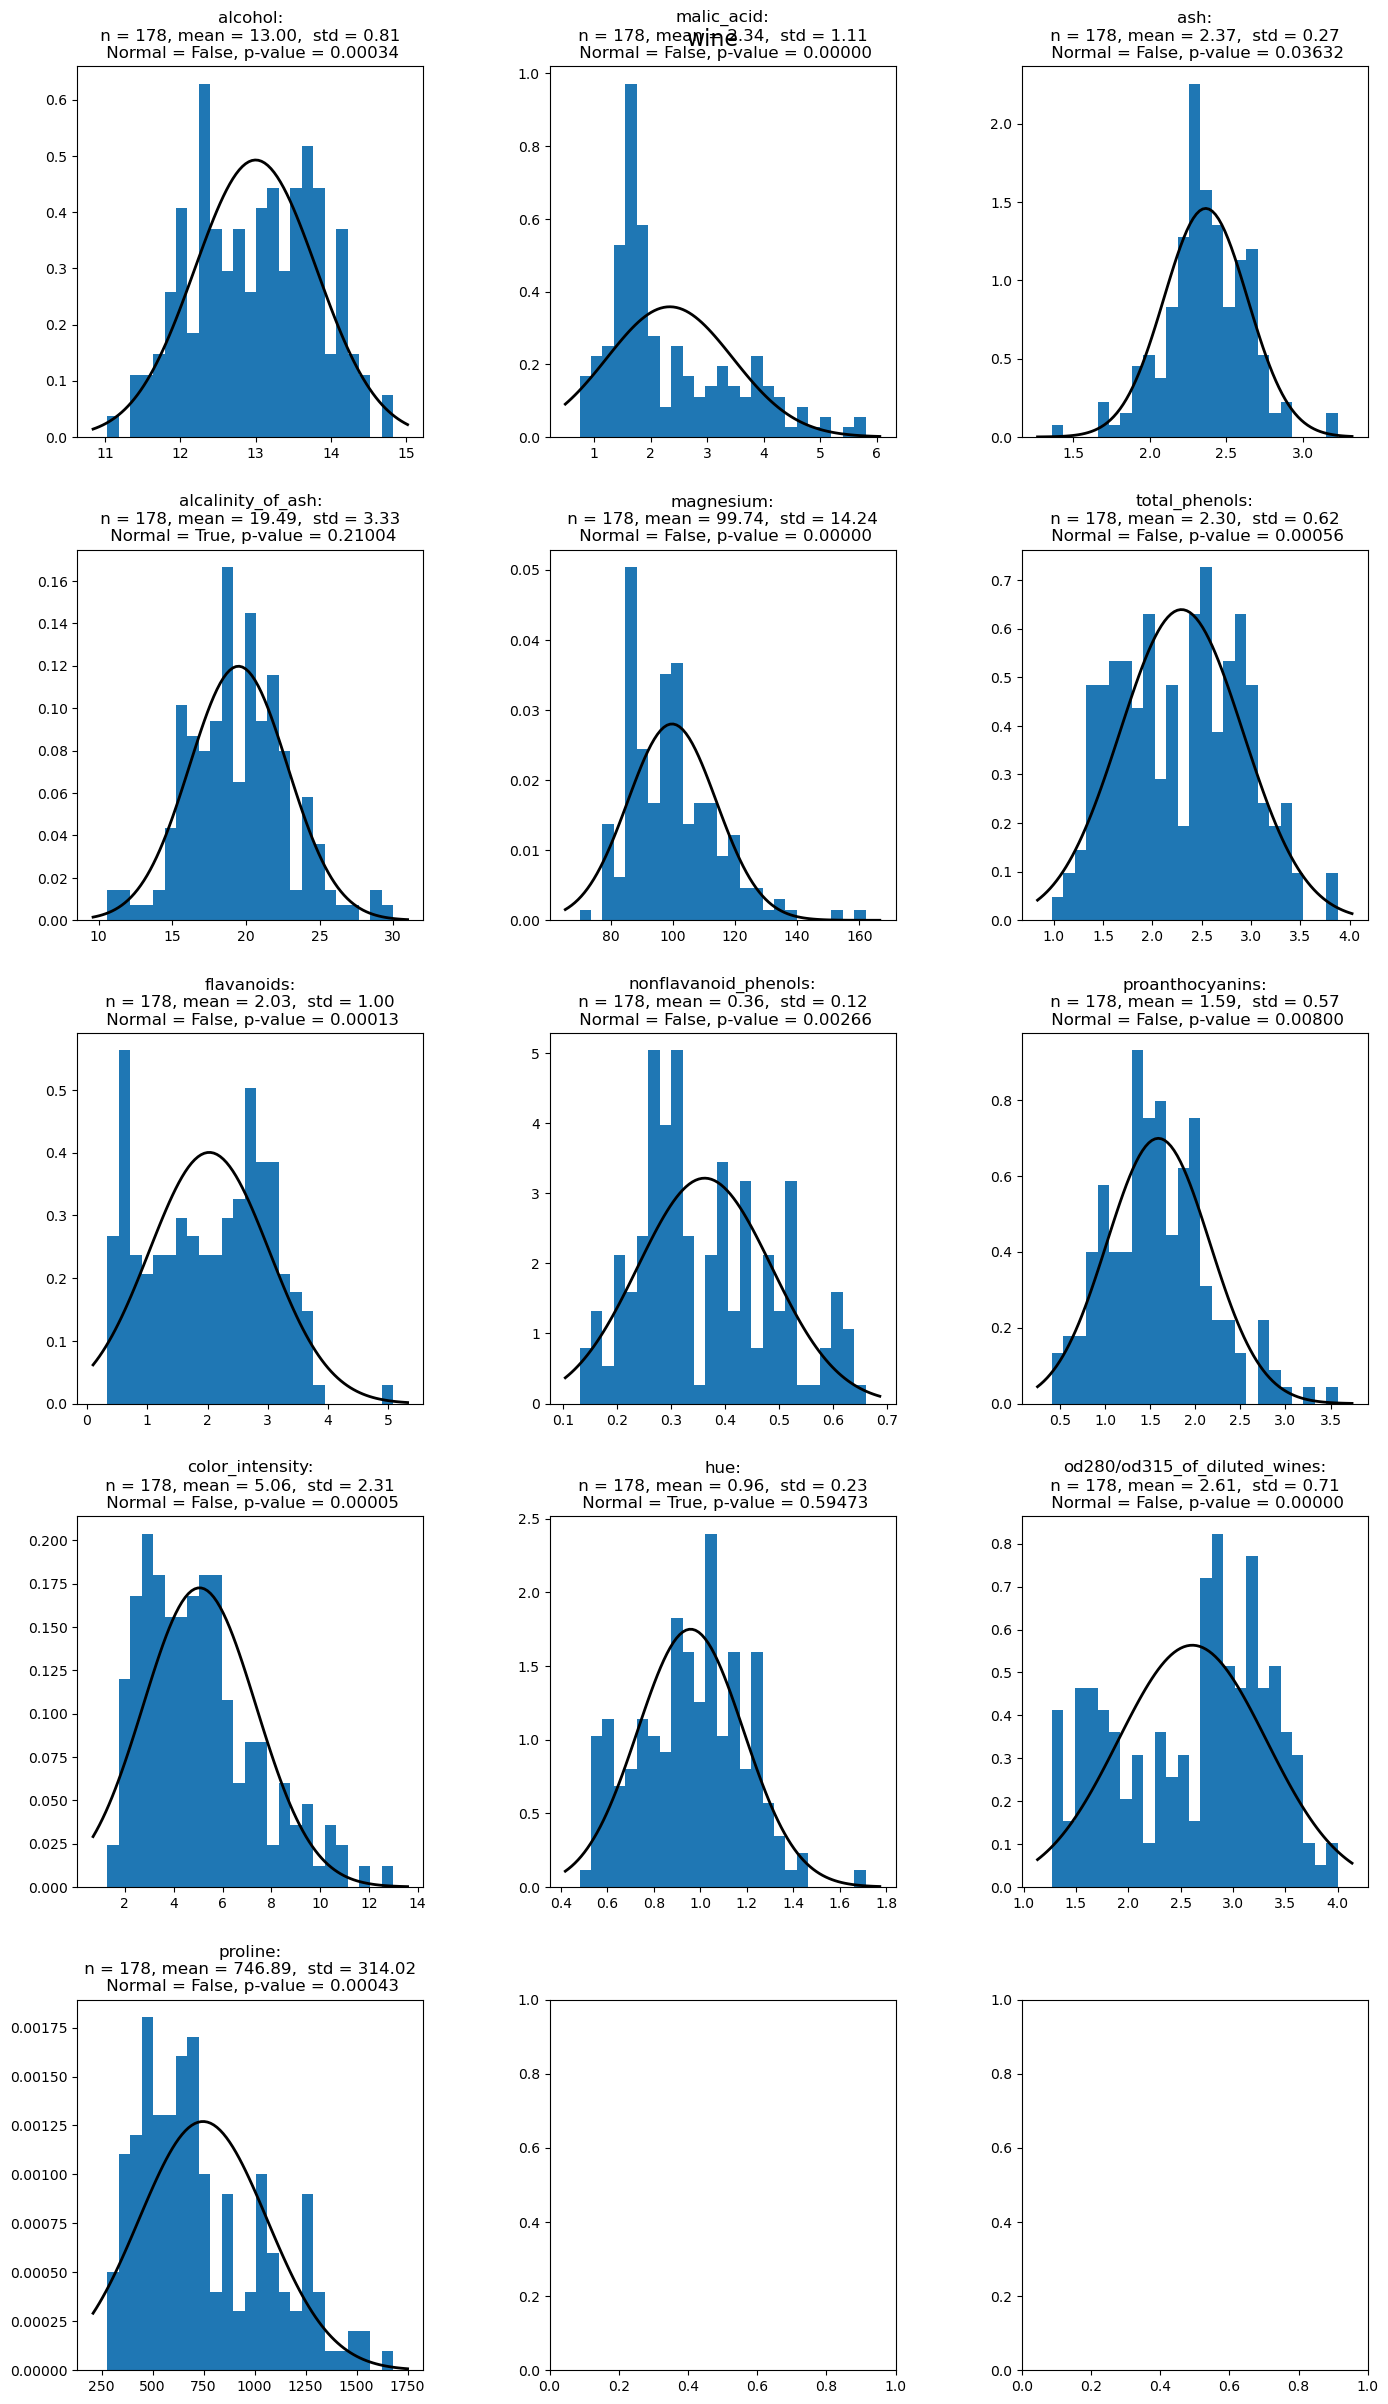

In [25]:
plot_dataset("wine", wine_df, nrows=5)

p = 0.594729
The null hypothesis cannot be rejected


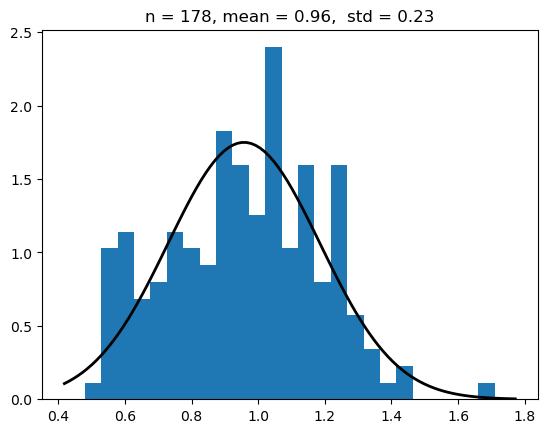

In [26]:
data = wine_df["hue"].sort_values().reset_index(drop=True)
is_normal(data)

In [27]:
anomalies = find_anomalies(data)
anomalies

lower limit= 0.27366362
upper limit= 1.64123526


[1.71]

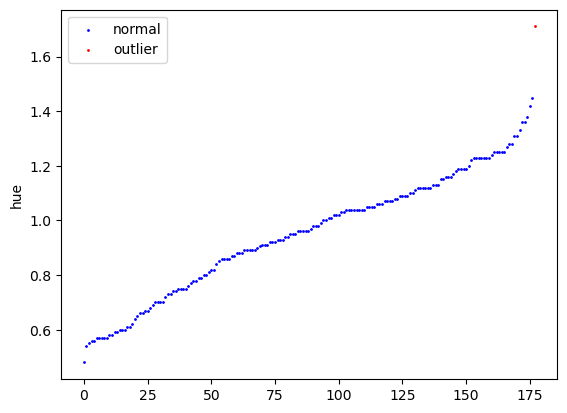

In [28]:
plot_outliers(data, anomalies, ylabel="hue")

p = 4.87898e-11
The null hypothesis can be rejected


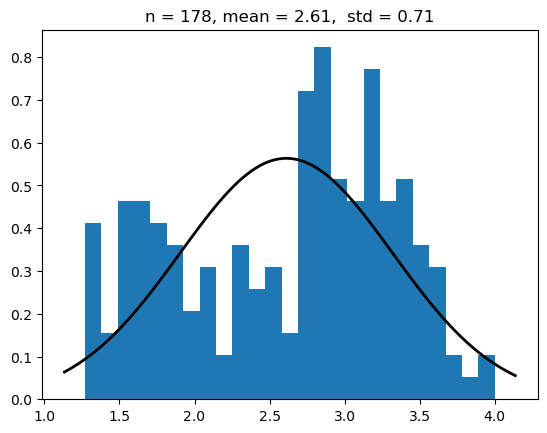

lower limit= 0.4877056
upper limit= 4.73566519


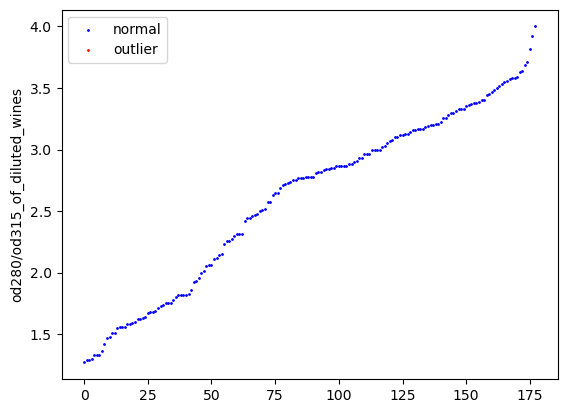

In [29]:
data = wine_df["od280/od315_of_diluted_wines"].sort_values().reset_index(drop=True)
is_normal(data)
anomalies = find_anomalies(data)
plot_outliers(data, anomalies, ylabel="od280/od315_of_diluted_wines")

### Titanic (not normal)

In [30]:
titanic = datasets.fetch_openml("titanic", version=1)
titanic_df = pd.DataFrame(titanic["data"], columns = titanic["feature_names"])

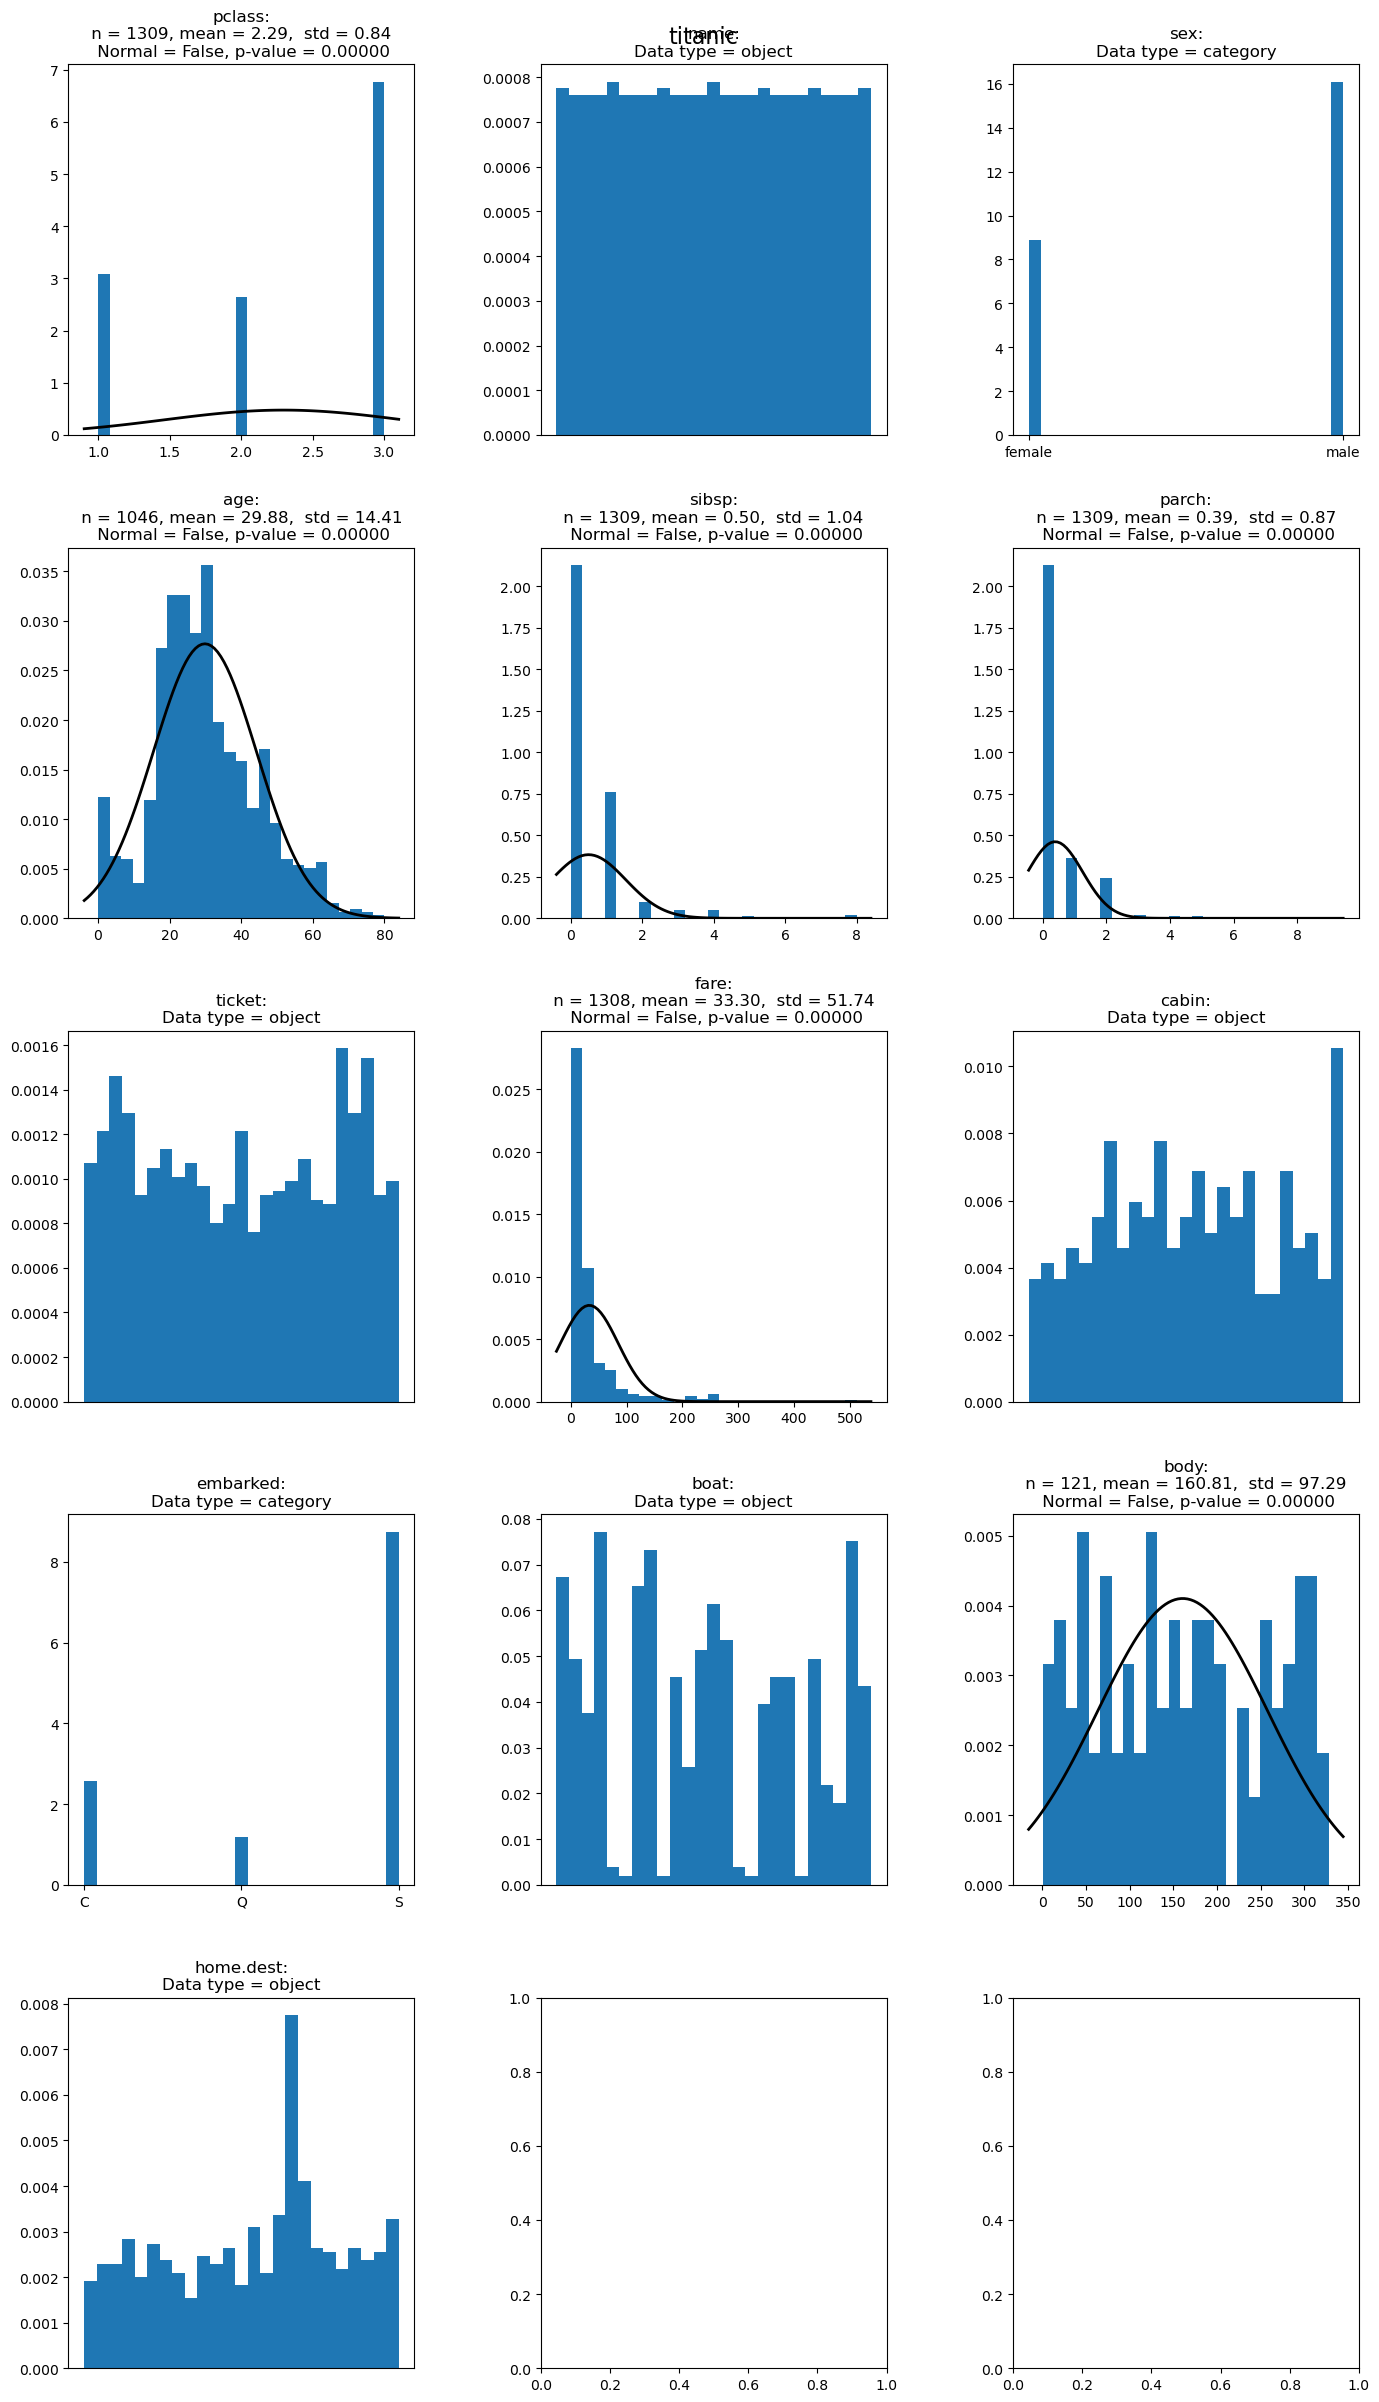

In [31]:
plot_dataset("titanic", titanic_df, nrows=5)

p = 2.30506e-13
The null hypothesis can be rejected


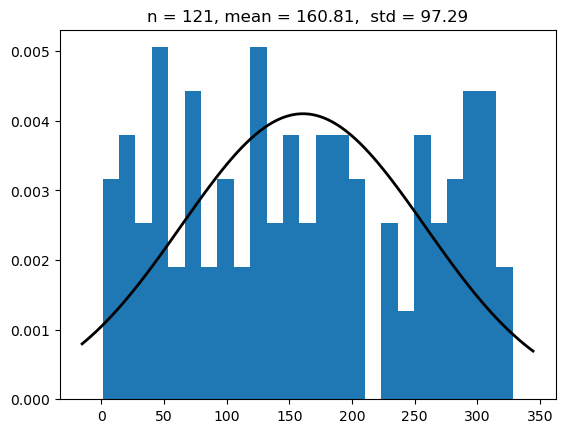

In [32]:
data = titanic_df["body"].sort_values().reset_index(drop=True).dropna()
is_normal(data.dropna())

In [33]:
anomalies = find_anomalies(data)
anomalies

lower limit= -131.06721706
upper limit= 452.68705177


[]

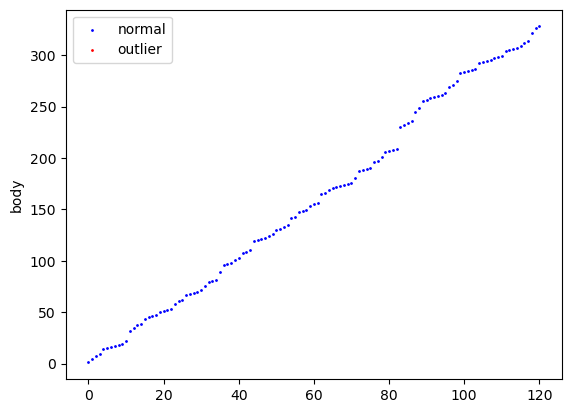

In [34]:
plot_outliers(data, anomalies, ylabel="body")

### 9. does the 0,3% rule apply?
- yes most of the time
- sometimes it could be more restrictive.

### 10. what are differences between the normally distributed and the non-normally distributed data sets with respect to the outlier detection? 
- Works best on normally distributed data?
- Based on the std not valid for highly unnormal distributed data

### 11. Which statement can be made and which cannot?
- We dont know that much from this smal test but it seems like the Method works with normal distributed data
- Not a general purpose method
- Accurate on some normal distributed data
- Well explainable
- Takes only one feature into account!